# Цели.

## 1. Подготовить датасет к использованию моделью машинного обучения.
## 2. Найти скрытые взаимосвязи и выделить признаци наиболее коррелирующие с целевым признаком.
## 3. Очистить датасет от ненужной информации.
## 4. Оценить количество пропусков в столбцах удалить их или заполнить.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

df = pd.read_csv('stud_math.csv')
# Удаляем лишеий столбец
df.drop(['studytime, granular'], inplace = True, axis = 1) 
# Переименовываем столбцы для удобства
df.rename(columns={'Pstatus':'pstatus', 'Medu':'medu', 'Fedu':'fedu', 'Mjob':'mjob', 'Fjob':'fjob'}, inplace=True)
# показывать больше колонок
pd.set_option('display.max_columns', 50)
sns.set_theme()

def famrel_fix(a):
    if a == -1.0:
        a = 1.0
    return a



In [5]:
df

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [6]:
# Посмотрим на размерность
df.shape

(395, 29)

In [7]:
# Смотрим на количество числовых и категориальных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [8]:
# Обнаруживаем пропуски
# 10% процентов пропусков это 39
df.isna().sum()>=39

school        False
sex           False
age           False
address       False
famsize       False
pstatus        True
medu          False
fedu          False
mjob          False
fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup         True
paid           True
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
health        False
absences      False
score         False
dtype: bool

In [9]:
df.isna().sum()

school         0
sex            0
age            0
address       17
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [10]:
nominative = df.select_dtypes(include = ['object'])
nominative.columns

Index(['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

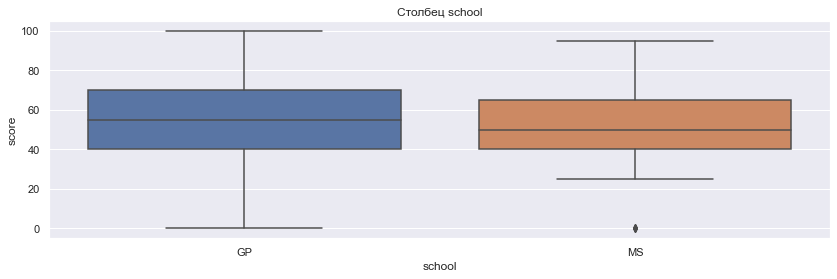

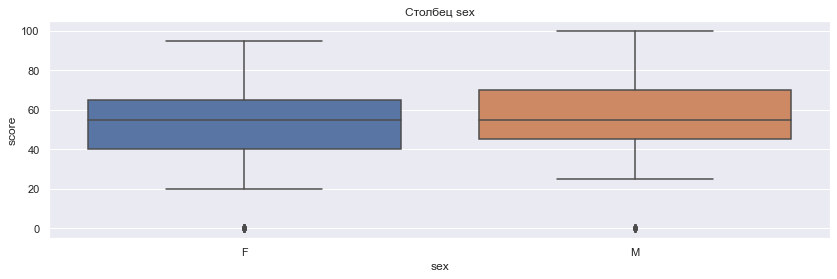

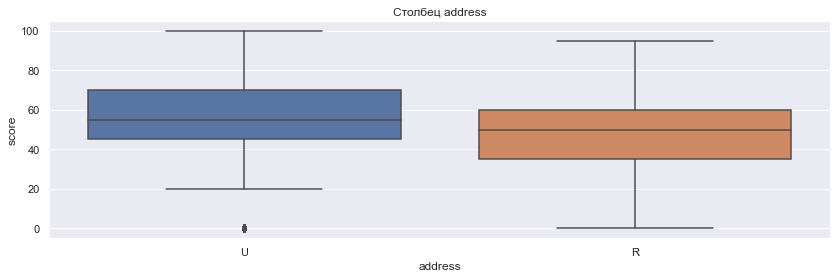

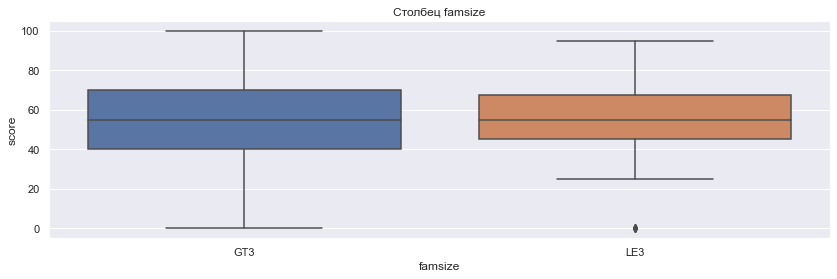

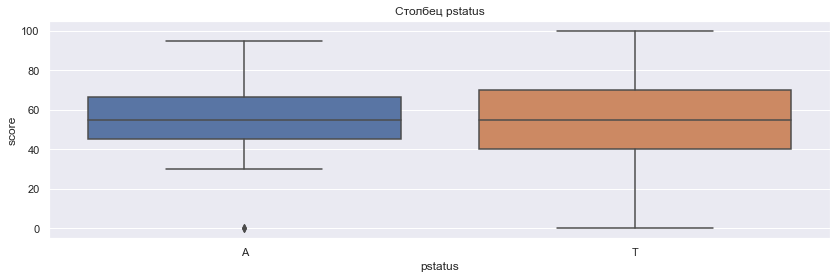

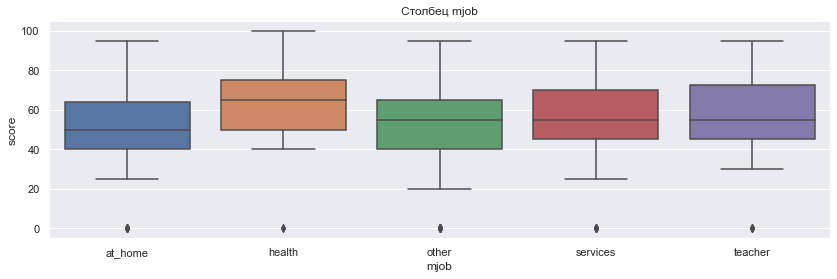

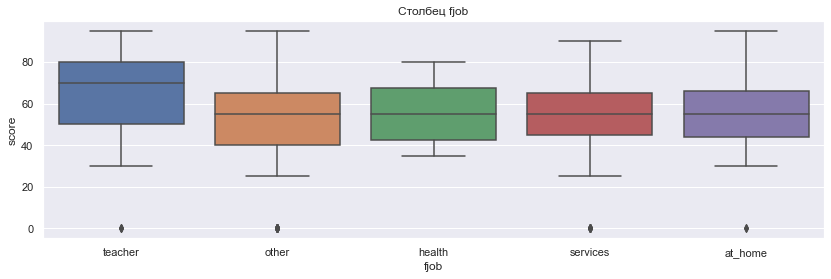

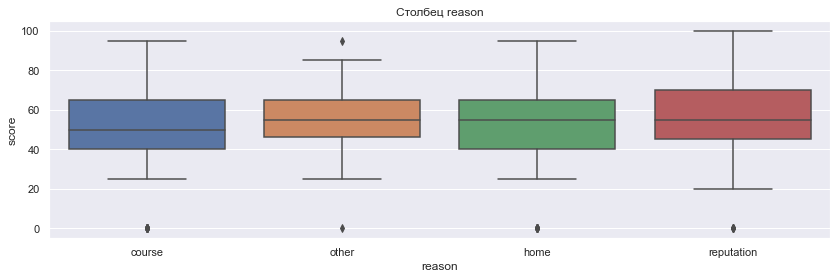

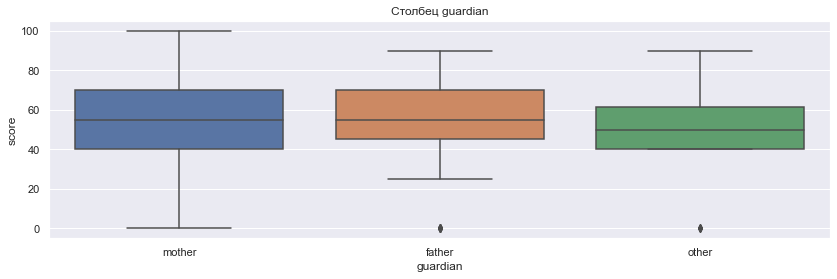

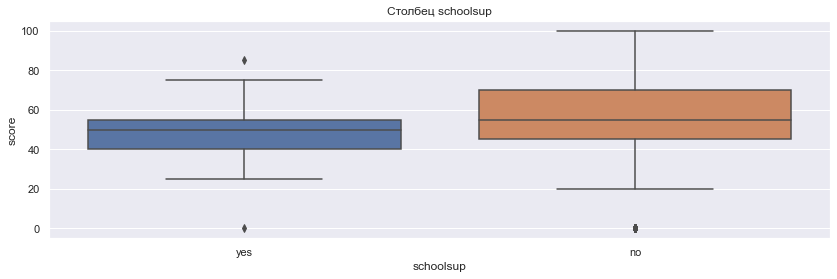

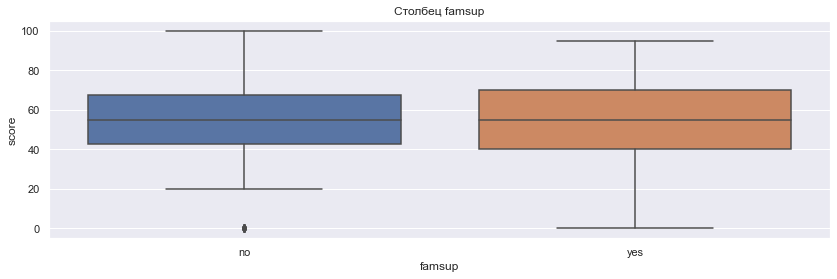

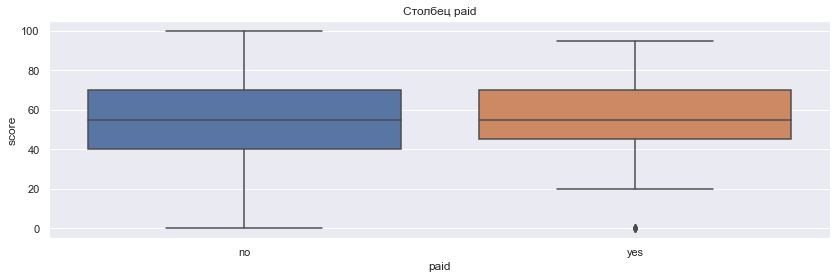

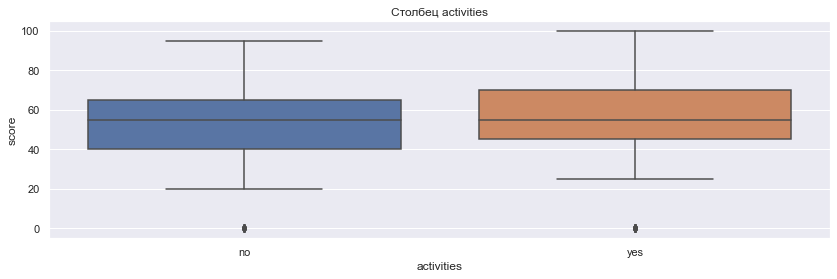

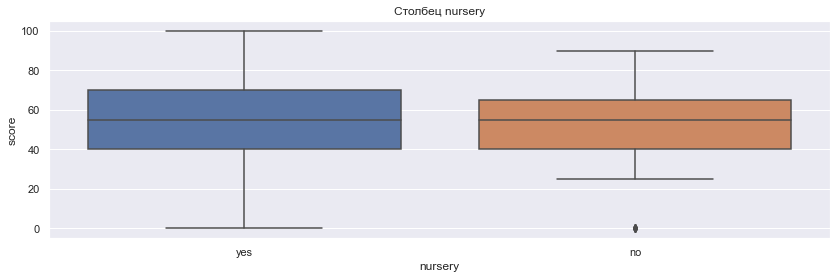

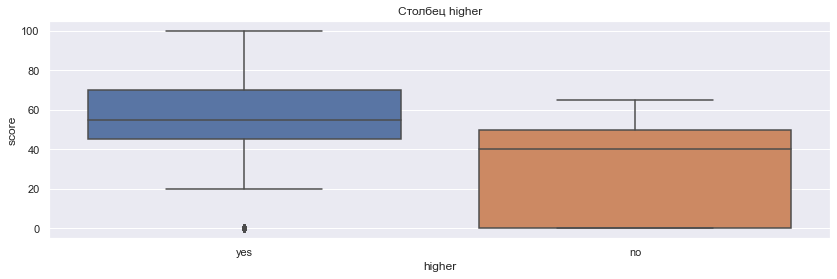

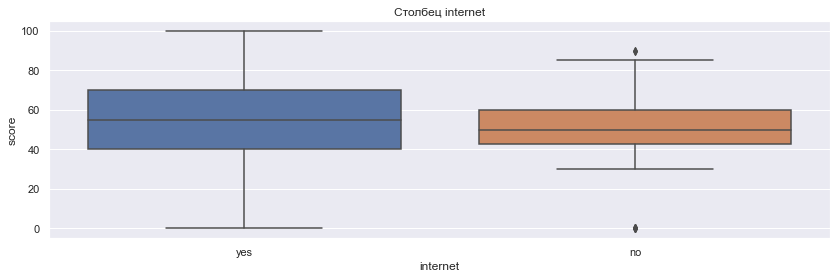

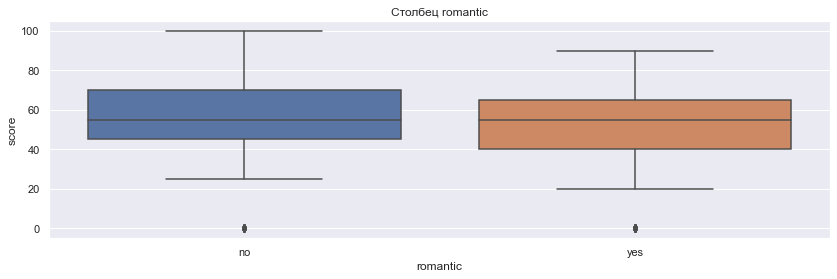

In [11]:
# Посмотрим на графики номинативных переменных
# Отметим, что столбцы ['school', 'sex', 'address', 'mjob', 'fjob','reason', 'romantic']
# показывают большую зависимость чем другие
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    ax.set_title('Столбец ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

<AxesSubplot:xlabel='famsup', ylabel='score'>

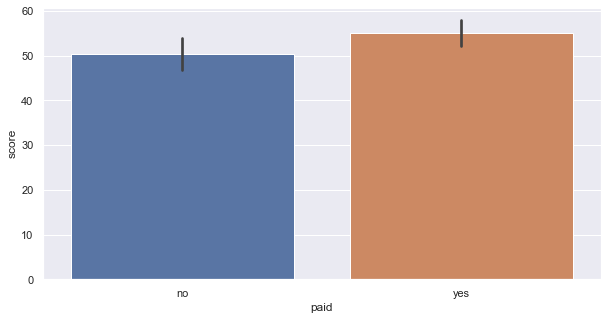

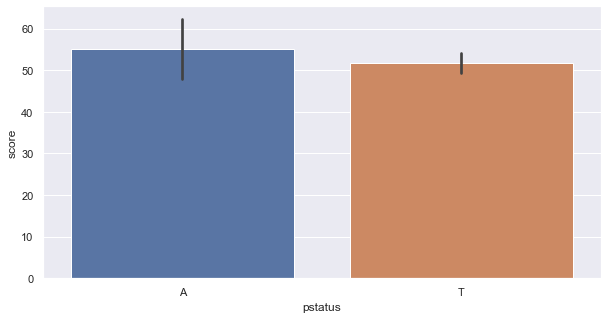

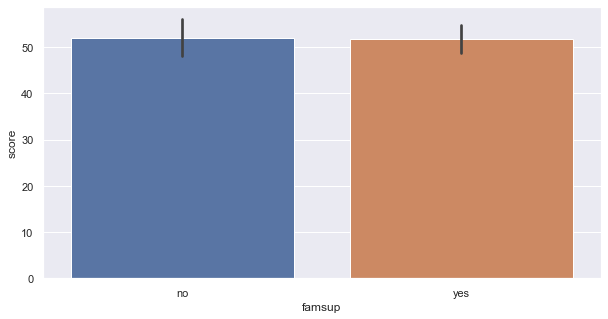

In [12]:
# Посмотрим распределение признаков в этих столбцах в зависимости от score
plt.figure(figsize = (10,5))
sns.barplot(x = 'paid', y = 'score', data = df)

plt.figure(figsize = (10,5))
sns.barplot(x = 'pstatus', y = 'score', data = df)

plt.figure(figsize = (10,5))
sns.barplot(x = 'famsup', y = 'score', data = df)

In [13]:
# Какой - то выдающейся зависимости не видно удаляем столбцы
# Столбец schoolsup на 90% процентов заполнен значением 'no' тоже удаляем
df.drop(['pstatus', 'paid', 'famsup','schoolsup'], inplace = True, axis = 1) 


<AxesSubplot:>

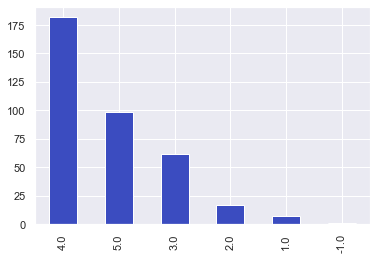

In [14]:
# Столбец famrel имеет значение '-1' , что не обусловленно условием. Предположим что произошла опечатка  и уберем знак '-'
df['famrel'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm')

In [15]:
# Столбец с целевыми признaками имеет 37 строк с значением '0' это явно неверные 
# данные в связи с тем что мала вероятность что ученик не набрал ни одного бала. 
# изменять значения целевого столбца нельзя поэтому удаляем строки со значением '0'
df = df.drop(df[df.score == 0].index)

<AxesSubplot:>

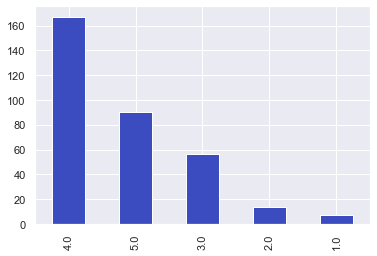

In [16]:
df.famrel = df.famrel.apply(famrel_fix)
df['famrel'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


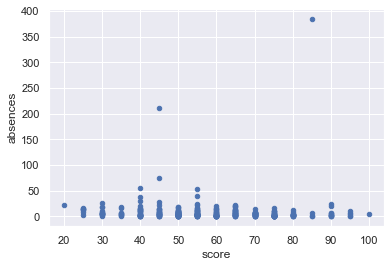

In [17]:
# Посмотрим на столбец absences видим явные выбросы. Но после их удаления видим, 
# что кореляция очень мала поэтому отменяем изменения и удаляем столбец. 
df.plot(x = 'score', 
        y = 'absences', 
        kind = 'scatter', 
        grid = True)
df.drop(['absences'], inplace = True, axis = 1) 


# display(df.absences.describe())
# display(df.absences.median())
# IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
# perc25 = df.absences.quantile(0.25)
# perc75 = df.absences.quantile(0.75)
# l = perc25 - 1.5*IQR 
# h = perc75 + 1.5*IQR
# print(h, l)
# df = df.drop(df[df.absences > 17].index)
# df.plot(x = 'score', 
#         y = 'absences', 
#         kind = 'scatter', 
#         grid = True)

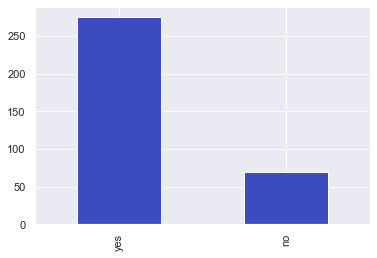

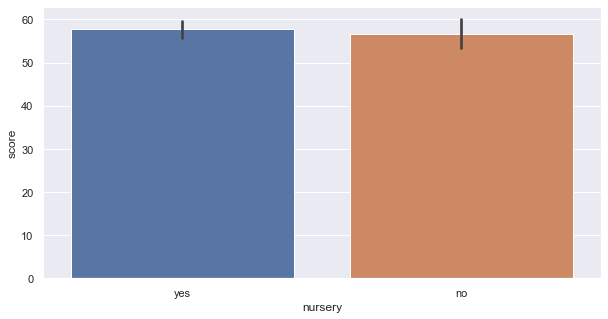

In [18]:
# Посмотрим на столбец 'nursery' наблюдаем отсутствие зависимостей удаляем.
df['nursery'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm')

plt.figure(figsize = (10,5))
sns.barplot(x = 'nursery', y = 'score', data = df)

df.drop(['nursery'], inplace = True, axis = 1) 


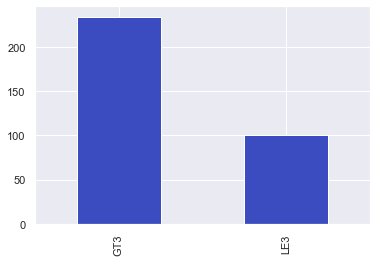

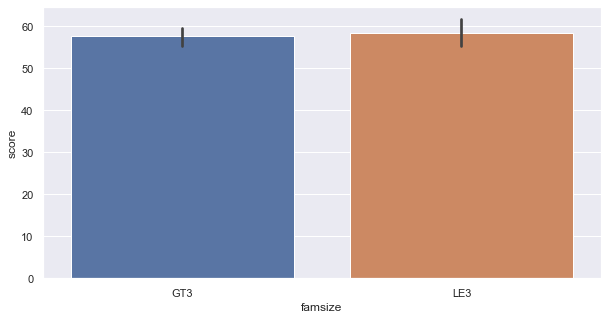

In [19]:
# Посмотрим на столбец 'famsize' наблюдаем отсутствие зависимостей удаляем.
df['famsize'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm')

plt.figure(figsize = (10,5))
sns.barplot(x = 'famsize', y = 'score', data = df)

df.drop(['famsize'], inplace = True, axis = 1) 

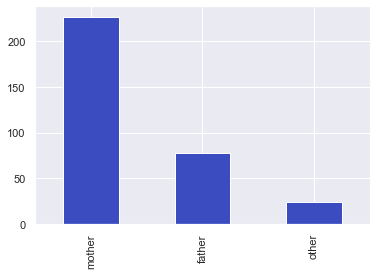

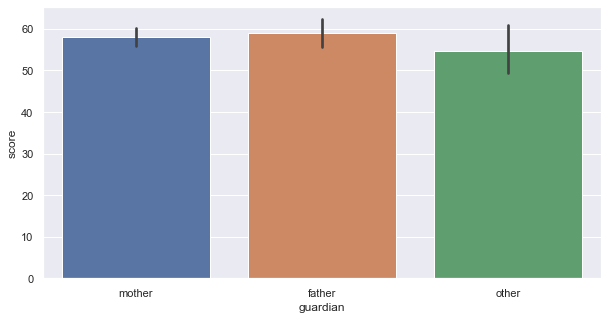

In [20]:
# Посмотрим на столбец 'guardian' наблюдаем наблюдаем небольшое занижение а столбце other,
# но выборка other слишком мала удаляем.
df['guardian'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm')

plt.figure(figsize = (10,5))
sns.barplot(x = 'guardian', y = 'score', data = df)

df.drop(['guardian'], inplace = True, axis = 1) 

yes    175
no     171
Name: activities, dtype: int64

activities
no     56.845238
yes    58.808140
Name: score, dtype: float64

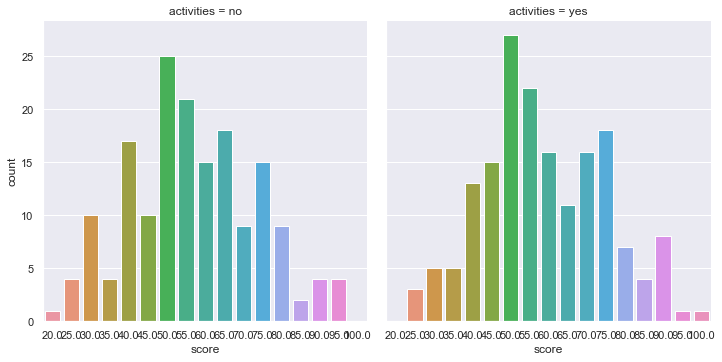

In [21]:
# Посмотрим на столбец activities и обнаружим, что данные распределены примерно одинаково этот столбец нам не поможет удаляем
display(df.activities.value_counts())
display(df.groupby('activities')['score'].mean())
sns.catplot(x = 'score', col = 'activities', kind = 'count', data = df)
df.drop(['activities'], inplace = True, axis = 1) 


yes    326
no      13
Name: higher, dtype: int64

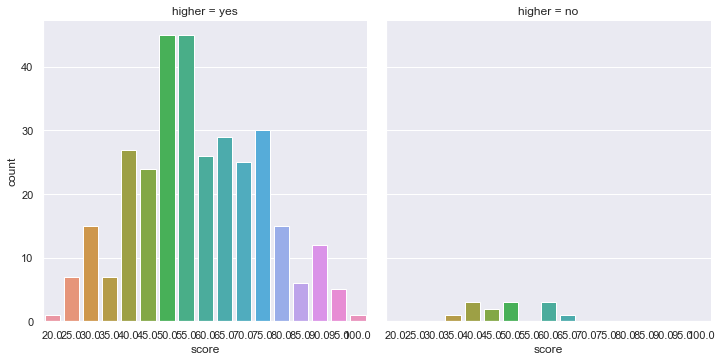

In [22]:
# столбец higher нам тоже не поможет потому что почти все хотят высшее образование. Удаляем.
display(df.higher.value_counts())
sns.catplot(x = 'score', col = 'higher', kind = 'count', data = df)
df.drop(['higher'], inplace = True, axis = 1) 


yes    279
no      50
Name: internet, dtype: int64

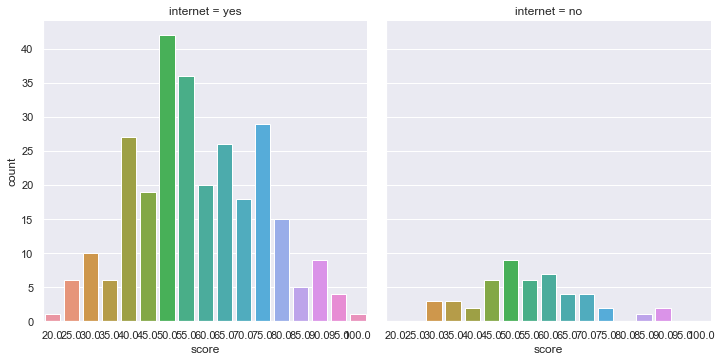

In [23]:
# Подобная история и для владельцев интернета
sns.catplot(x = 'score', col = 'internet', kind = 'count', data = df)
display(df.internet.value_counts())
df.drop(['internet'], inplace = True, axis = 1) 


In [24]:
numeric = df.select_dtypes(include = ['float64','int64'])

In [25]:
numeric.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,score
count,358.000000,356.000000,337.000000,335.000000,351.000000,338.000000,334.000000,348.000000,351.000000,345.000000,352.000000
mean,16.659218,2.792135,2.643917,1.432836,2.048433,0.284024,3.955090,3.244253,3.099715,3.518841,57.755682
std,1.268476,1.096239,2.308931,0.692645,0.835253,0.686309,0.890939,1.004656,1.092193,1.406099,16.200928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,45.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,100.000000


In [26]:
numeric_cor = numeric.corr()
numeric_cor

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,score
age,1.000000,-0.141398,-0.128343,0.104216,-0.008716,0.262303,0.082275,0.019367,0.139860,-0.053792,-0.131542
medu,-0.141398,1.000000,0.253011,-0.174105,0.068027,-0.215006,-0.018166,0.007068,0.070731,-0.034891,0.186477
fedu,-0.128343,0.253011,1.000000,0.033026,0.046579,-0.143204,0.043465,-0.075707,-0.030944,0.028293,0.069842
traveltime,0.104216,-0.174105,0.033026,1.000000,-0.097440,0.107639,-0.017454,-0.018409,0.035267,-0.010930,-0.075516
studytime,-0.008716,0.068027,0.046579,-0.097440,1.000000,-0.152980,0.056544,-0.125352,-0.027164,-0.086351,0.142055
failures,0.262303,-0.215006,-0.143204,0.107639,-0.152980,1.000000,0.020788,0.133837,0.142730,0.057055,-0.289377
famrel,0.082275,-0.018166,0.043465,-0.017454,0.056544,0.020788,1.000000,0.160329,0.051111,0.103893,0.040590
freetime,0.019367,0.007068,-0.075707,-0.018409,-0.125352,0.133837,0.160329,1.000000,0.296358,0.069779,-0.012457
goout,0.139860,0.070731,-0.030944,0.035267,-0.027164,0.142730,0.051111,0.296358,1.000000,-0.007655,-0.182286
health,-0.053792,-0.034891,0.028293,-0.010930,-0.086351,0.057055,0.103893,0.069779,-0.007655,1.000000,-0.075340


In [27]:
pd.DataFrame(numeric_cor.score.sort_values(ascending = False))

,score
score,1.000000
medu,0.186477
studytime,0.142055
fedu,0.069842
famrel,0.040590
freetime,-0.012457
health,-0.075340
traveltime,-0.075516
age,-0.131542
goout,-0.182286


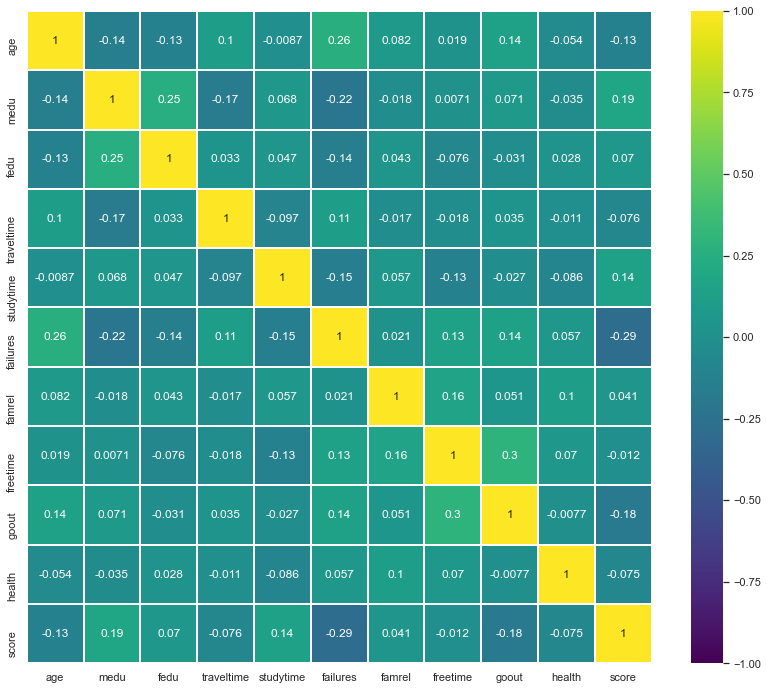

In [28]:
# Смотрим на таблицу кореляций
# Переменные age и failures слишком корелируют между собой и что бы избежать проблемы колениарности удаляем одну из них
# А именно age потому что failures показывает большую отрицательную кореляцию
# Тоже самое для пар fedu,medu и freetime,goout
# Так же столбец famrel имеет минимальную кореляцию с score
fig, ax = plt.subplots(figsize = (14,12))
sns.heatmap(numeric_cor,linecolor = "white",linewidths = 1, annot = True,cmap = 'viridis', vmax = 1.0, vmin = -1)
df.drop(['age','fedu','freetime', 'famrel'], inplace = True, axis = 1) 


,medu,traveltime,studytime,failures,goout,health,score
medu,1.000000,-0.174105,0.068027,-0.215006,0.070731,-0.034891,0.186477
traveltime,-0.174105,1.000000,-0.097440,0.107639,0.035267,-0.010930,-0.075516
studytime,0.068027,-0.097440,1.000000,-0.152980,-0.027164,-0.086351,0.142055
failures,-0.215006,0.107639,-0.152980,1.000000,0.142730,0.057055,-0.289377
goout,0.070731,0.035267,-0.027164,0.142730,1.000000,-0.007655,-0.182286
health,-0.034891,-0.010930,-0.086351,0.057055,-0.007655,1.000000,-0.075340
score,0.186477,-0.075516,0.142055,-0.289377,-0.182286,-0.075340,1.000000


<AxesSubplot:>

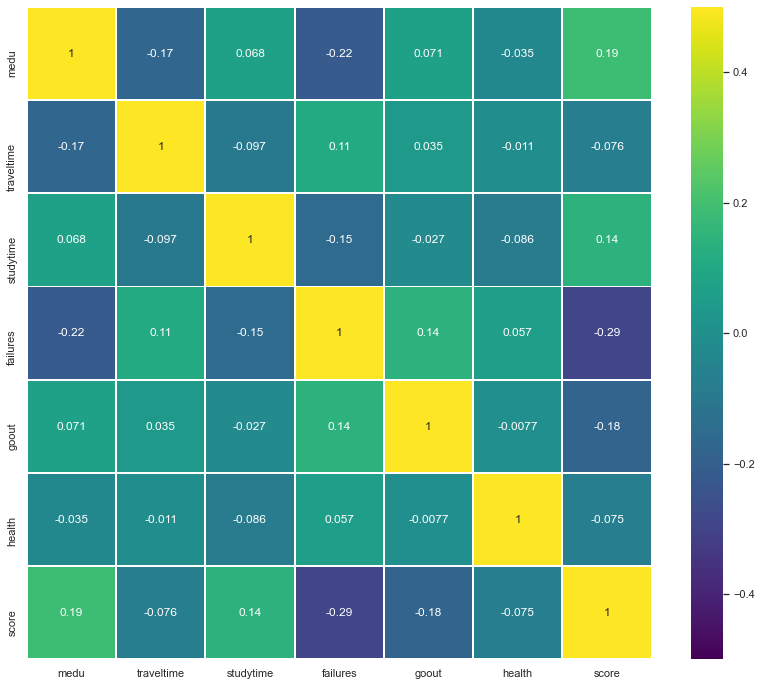

In [29]:
# Посмотрим на таблицу кореляций теперь

numeric_cor_ = df.select_dtypes(include = ['float64','int64'])
numeric_cor_ = numeric_cor_.corr()
display(numeric_cor_)
fig, ax = plt.subplots(figsize = (14,12))
sns.heatmap(numeric_cor_, linecolor = "white",linewidths = 1, annot = True,cmap = 'viridis', vmax = 0.5, vmin = -0.5)

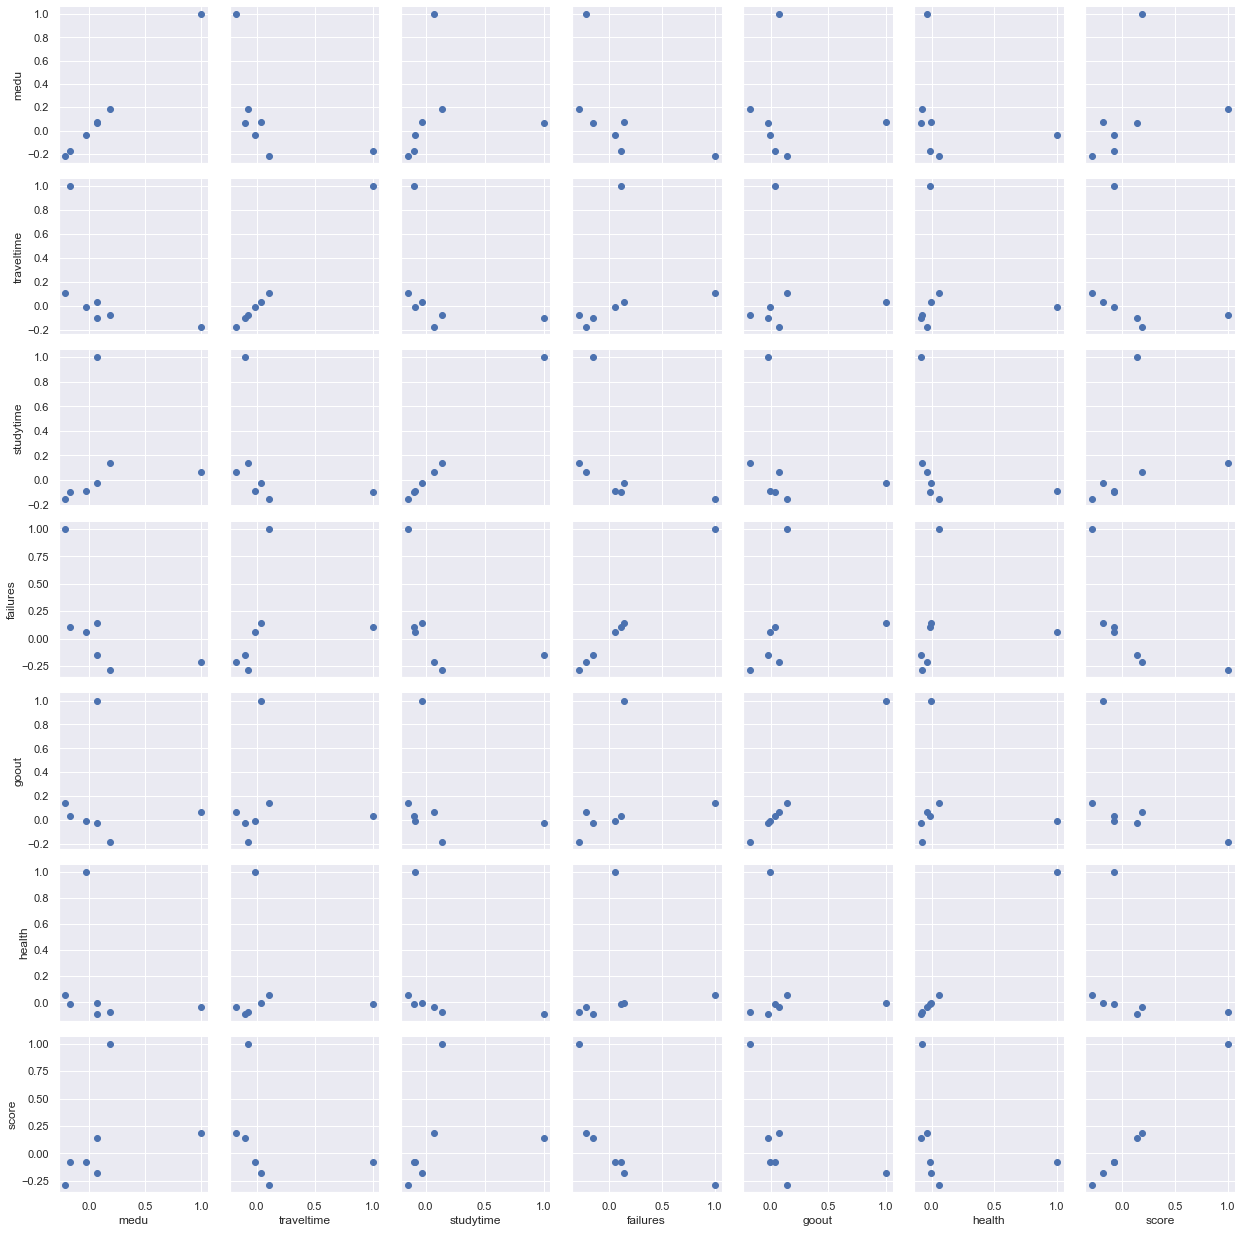

In [30]:
# Также мы можем посмотреть на графики пореляции
pair_grid_plot = sns.PairGrid(numeric_cor_)
pair_grid_plot.map(plt.scatter)

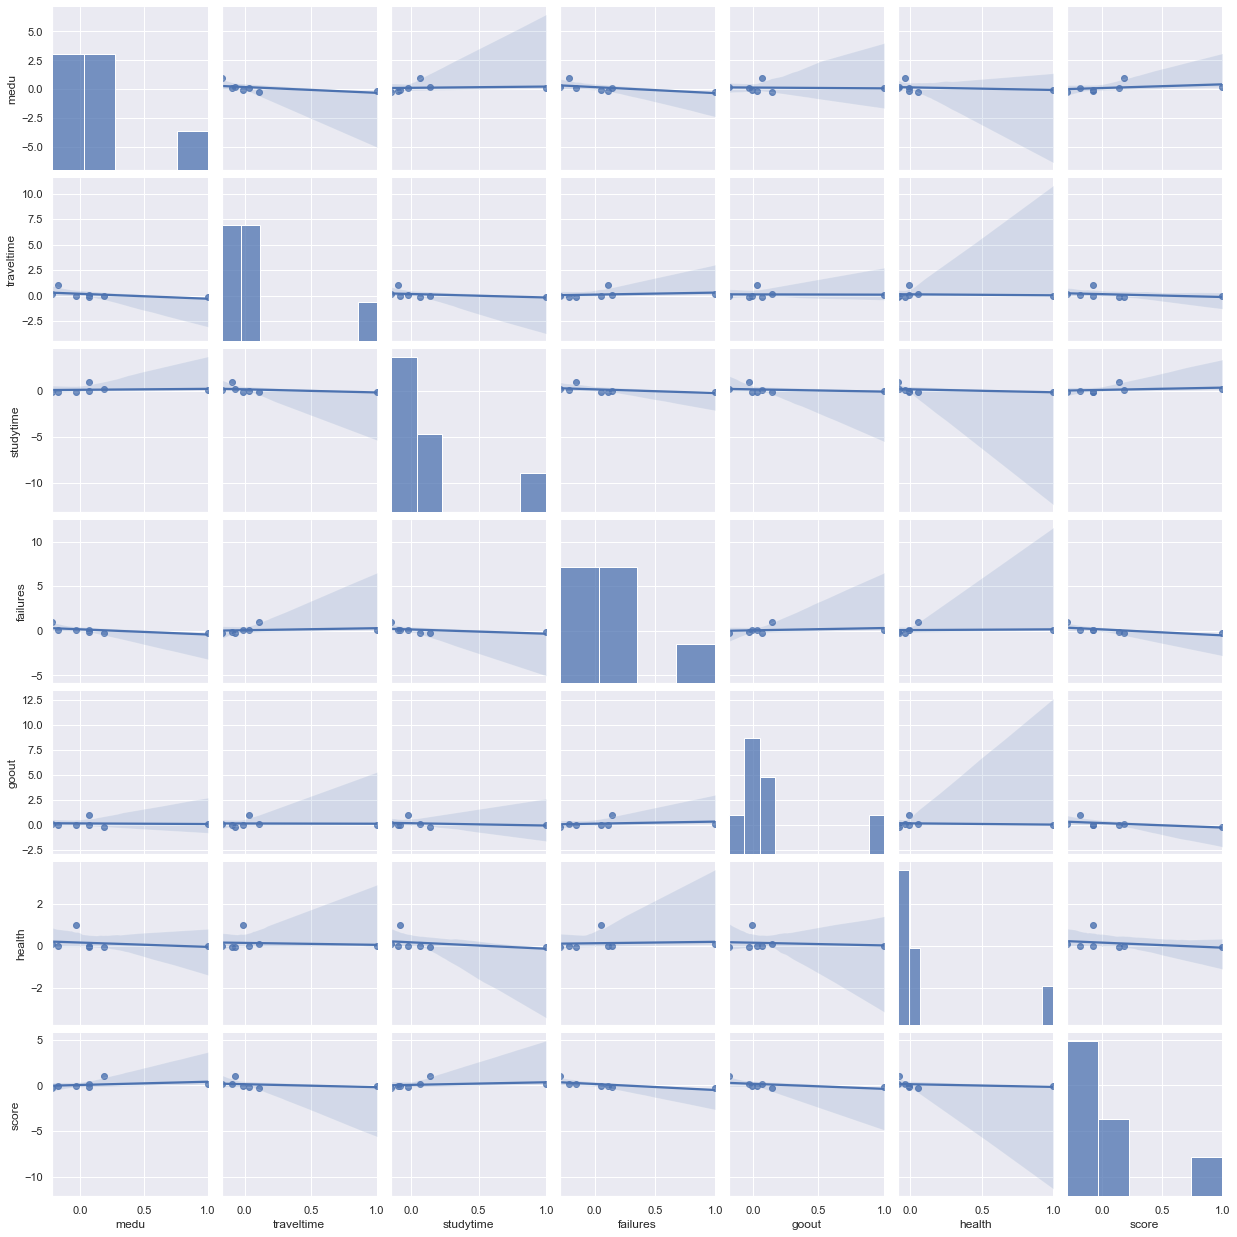

In [31]:
sns.pairplot(numeric_cor_, kind = 'reg')


In [32]:
# Проверим остальные столбцы на пропуски
display(df.medu.describe())
display(df.medu.value_counts())
display(df.medu.isna().sum())
display(df.medu.mode())
df['medu']=df['medu'].fillna(4) 


count    356.000000
mean       2.792135
std        1.096239
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

4.0    125
2.0     90
3.0     88
1.0     50
0.0      3
Name: medu, dtype: int64

2

0    4.0
dtype: float64

In [33]:
display(df.health.mode())
df['health']=df['health'].fillna(5.0) 


0    5.0
dtype: float64

In [34]:
display(df.goout.mode())
df['goout']=df['goout'].fillna(3) 


0    3.0
dtype: float64

In [35]:
display(df.studytime.mode())
df['studytime']=df['studytime'].fillna(2) 

0    2.0
dtype: float64

In [36]:
display(df.reason.mode())
df['reason']=df['reason'].fillna('course') 


0    course
dtype: object

In [37]:
display(df.address.mode())
df['address']=df['address'].fillna('U') 


0    U
dtype: object

In [38]:
display(df.mjob.mode())
df['mjob']=df['mjob'].fillna('other') 

0    other
dtype: object

In [39]:
display(df.fjob.mode())
df['fjob']=df['fjob'].fillna('other') 

0    other
dtype: object

In [40]:
display(df.traveltime.mode())
df['traveltime']=df['traveltime'].fillna('1.0') 

0    1.0
dtype: float64

In [41]:
display(df.failures.mode())
df['failures']=df['failures'].fillna('0.0') 

0    0.0
dtype: float64

In [42]:
display(df.romantic.mode())
df['romantic']=df['romantic'].fillna('no')

0    no
dtype: object

In [43]:
# Расмонтип оставшиеся номинативные признаки
nominative_ = df.select_dtypes(include = ['object'])
nominative_['score'] = df['score']
nominative_

<ipython-input-43-347bd669160f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominative_['score'] = df['score']


,school,sex,address,mjob,fjob,reason,traveltime,failures,romantic,score
0,GP,F,U,at_home,teacher,course,2.0,0.0,no,30.0
1,GP,F,U,at_home,other,course,1.0,0.0,no,30.0
2,GP,F,U,at_home,other,other,1.0,3.0,no,50.0
3,GP,F,U,health,other,home,1.0,0.0,yes,75.0
4,GP,F,U,other,other,home,1.0,0.0,no,50.0
...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,services,services,course,1.0,2.0,no,45.0
391,MS,M,U,services,services,course,2.0,0.0,no,80.0
392,MS,M,R,other,other,course,1.0,3.0,no,35.0
393,MS,M,R,services,other,course,3.0,0.0,no,50.0


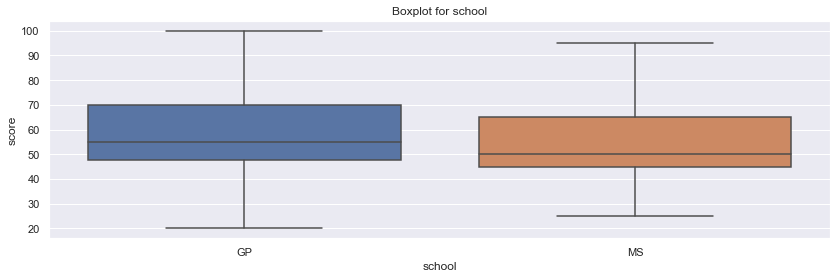

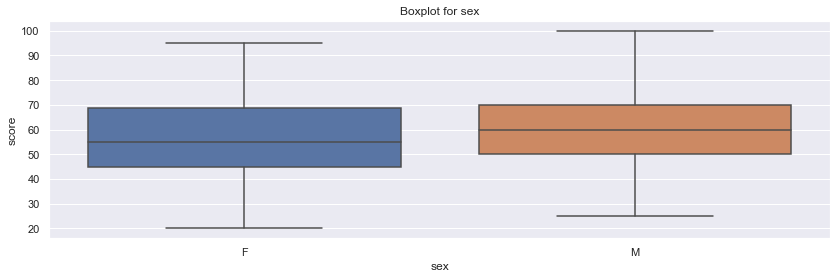

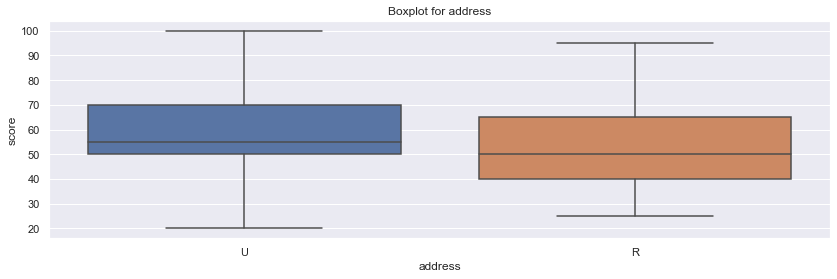

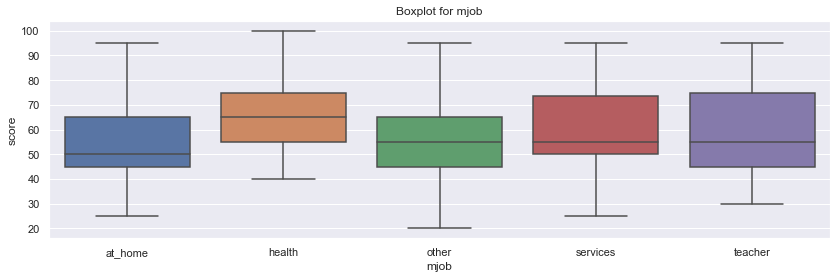

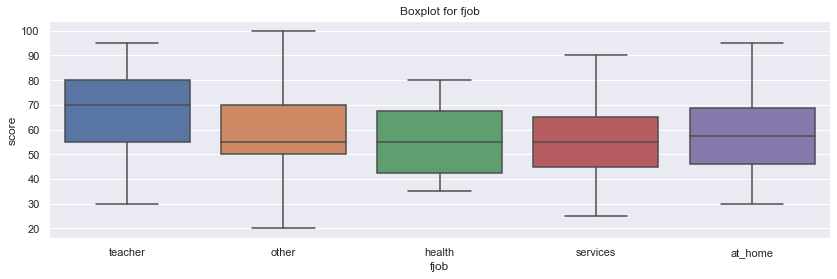

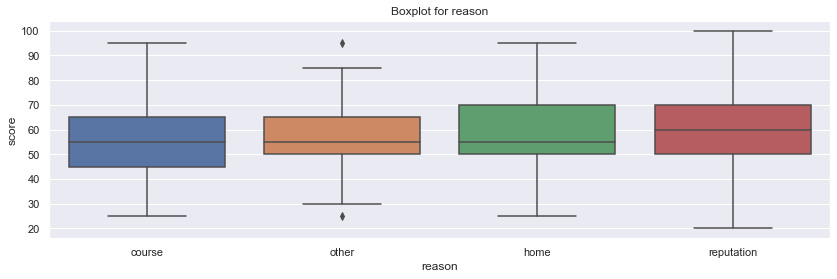

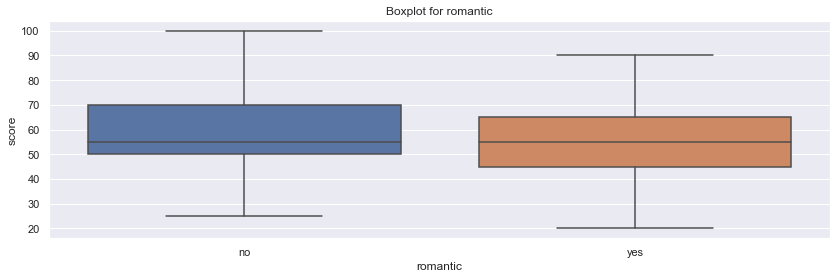

In [46]:
# Еще раз посмотрим на графики распределения оставшихся номинативных признаков 
# проверим если после наших манипуляций не произошли изменения в графиках
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=nominative_.loc[nominative_.loc[:, column].isin(nominative_.loc[:, column].value_counts().index[:10])],
               ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'mjob', 'fjob',
       'reason', 'romantic']:
    get_boxplot(col)

In [45]:
df

,school,sex,address,medu,mjob,fjob,reason,traveltime,studytime,failures,romantic,goout,health,score
0,GP,F,U,4.0,at_home,teacher,course,2.0,2.0,0.0,no,4.0,3.0,30.0
1,GP,F,U,1.0,at_home,other,course,1.0,2.0,0.0,no,3.0,3.0,30.0
2,GP,F,U,1.0,at_home,other,other,1.0,2.0,3.0,no,2.0,3.0,50.0
3,GP,F,U,4.0,health,other,home,1.0,3.0,0.0,yes,2.0,5.0,75.0
4,GP,F,U,3.0,other,other,home,1.0,2.0,0.0,no,2.0,5.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,2.0,services,services,course,1.0,2.0,2.0,no,4.0,4.0,45.0
391,MS,M,U,3.0,services,services,course,2.0,1.0,0.0,no,5.0,2.0,80.0
392,MS,M,R,1.0,other,other,course,1.0,1.0,3.0,no,3.0,3.0,35.0
393,MS,M,R,3.0,services,other,course,3.0,1.0,0.0,no,1.0,5.0,50.0


# Выводы

## 1. В датасете были расмотрены номинативные и числовые признаки.
## 2. С помощью графиков были найдены номинативные признаки, которые наиболее корелируют с целевым столбцом 'score'. Остальные удалены.
## 3. Числовые и смешаные признаки оценены с помощью таблици корреляций и выделены наиболее коррелирующие. остальные удалены.
## 4. Наибольшая взаимосвязь у числовых и смешаных признаков со столбцом 'score' у столбцов 'failures', 'studytime' и 'medu'.
## 5. У номинативных столбцы 'mjob', 'mjob', 'address', 'romantic'. Менее значимые 'school', 'sex', 'reason'.